# Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Carregando dataframe no Pandas

Carregando os dados dos arquivos *.tsv

localizados na mesma pasta.
train.tsv
test.tsv

In [2]:
dfTrain = pd.read_csv("train.tsv", sep='\t')
dfTest = pd.read_csv("test.tsv", sep='\t')

In [3]:
dfT = dfTest.drop('Id', axis=1)
dfT = dfT.drop('IdSentenca', axis=1)

In [4]:
dfT.head()

,Texto
0,An intermittently pleasing but mostly routine ...
1,An intermittently pleasing but mostly routine ...
2,An
3,intermittently pleasing but mostly routine effort
4,intermittently pleasing but mostly routine


# Retirando colunas irrelevantes do dataframe

In [5]:
df = dfTrain.drop('Id', axis=1)
df = df.drop('IdSentenca', axis=1)

In [6]:
#Verificando se tem entradas nulas
df.isna().sum()

Texto         0
Sentimento    0
dtype: int64

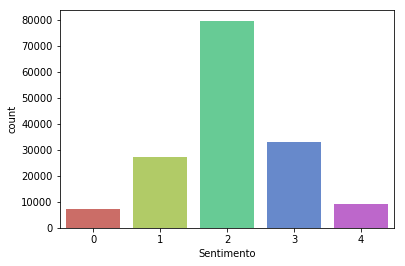

<Figure size 432x288 with 0 Axes>

In [7]:
#Bar-chart dos Sentimentos
#Segue distribuição normal
import seaborn as sns

sns.countplot(x='Sentimento', data=df, palette='hls')
plt.show()
plt.savefig('count plot')


# Utilizando bag of words para o conjunto de palavras

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.Texto)
X_train_counts.shape

(156060, 15240)

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(156060, 15240)

In [10]:
df0 = df[df['Sentimento'] == 0]
df1 = df[df['Sentimento'] == 1]
df2 = df[df['Sentimento'] == 2]
df3 = df[df['Sentimento'] == 3]
df4 = df[df['Sentimento'] == 4]

In [11]:
df1 = df1.sample(7072)
df2 = df2.sample(7072)
df3 = df3.sample(7072)
df4 = df4.sample(7072)

In [12]:
df_b = df0
df_b = df_b.append(df1)
df_b = df_b.append(df2)
df_b = df_b.append(df3)
df_b = df_b.append(df4)

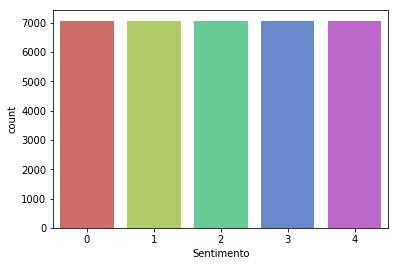

<Figure size 432x288 with 0 Axes>

In [13]:
import seaborn as sns

sns.countplot(x='Sentimento', data=df_b, palette='hls')
plt.show()
plt.savefig('count plot')

# MODELO NAIVE Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, df.Sentimento)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Texto'], df['Sentimento'],test_size=0.3, random_state = 63)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [16]:
dfT['Sentimento'] = 0

for index, row in dfT.iterrows():
    str1 = row.Texto
    #print(clf.predict(count_vect.transform([str1])))
    dfT.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [17]:
Teste = X_test.to_frame()
Teste['Sentimento'] = 0

In [18]:
for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
predictions =  Teste['Sentimento']

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[  187  1133   679    74     3]
 [  121  3363  4310   448    12]
 [   43  1714 19701  2395    66]
 [    4   287  4134  5124   212]
 [    0    30   534  1855   389]]
              precision    recall  f1-score   support

           0       0.53      0.09      0.15      2076
           1       0.52      0.41      0.46      8254
           2       0.67      0.82      0.74     23919
           3       0.52      0.52      0.52      9761
           4       0.57      0.14      0.22      2808

   micro avg       0.61      0.61      0.61     46818
   macro avg       0.56      0.40      0.42     46818
weighted avg       0.60      0.61      0.59     46818

0.6143790849673203


# MODELO REG. LOGISTICA

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

Teste = X_test.to_frame()
Teste['Sentimento'] = 0


for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

predictions =  Teste['Sentimento']

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))



C:\Users\adans\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adans\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


[[ 1258   592    92    41    93]
 [ 2135  3663  1492   435   529]
 [ 1991  3553 13269  3229  1877]
 [  579   612  1625  4227  2718]
 [   84    37    83   787  1817]]
              precision    recall  f1-score   support

           0       0.21      0.61      0.31      2076
           1       0.43      0.44      0.44      8254
           2       0.80      0.55      0.66     23919
           3       0.48      0.43      0.46      9761
           4       0.26      0.65      0.37      2808

   micro avg       0.52      0.52      0.52     46818
   macro avg       0.44      0.54      0.45     46818
weighted avg       0.61      0.52      0.54     46818

0.5176214276560297


# MODELO MLP (23,19,19)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(23,19,19),max_iter=100)

clf.fit(X_train_tfidf,y_train)

Teste = X_test.to_frame()
Teste['Sentimento'] = 0

for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

predictions =  Teste['Sentimento']

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\adans\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


[[  282  1230   507    56     1]
 [  390  4573  2906   365    20]
 [  219  4711 15880  3003   106]
 [   44   961  3526  4800   430]
 [    6   118   466  1853   365]]
              precision    recall  f1-score   support

           0       0.30      0.14      0.19      2076
           1       0.39      0.55      0.46      8254
           2       0.68      0.66      0.67     23919
           3       0.48      0.49      0.48      9761
           4       0.40      0.13      0.20      2808

   micro avg       0.55      0.55      0.55     46818
   macro avg       0.45      0.40      0.40     46818
weighted avg       0.55      0.55      0.55     46818



# MODELO RANDOM FOREST

In [25]:
from sklearn import ensemble
# Cria o modelo com 100 árvores
clf = ensemble.RandomForestClassifier ( n_estimators=10 )
clf.fit(X_train_tfidf,y_train)

Teste = X_test.to_frame()
Teste['Sentimento'] = 0

In [26]:
for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

predictions =  Teste['Sentimento']

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


[[  383   564  1026   101     2]
 [  330  2096  5394   414    20]
 [   72  1441 20428  1879    99]
 [   12   221  5945  3062   521]
 [    1    47  1176  1013   571]]
              precision    recall  f1-score   support

           0       0.48      0.18      0.27      2076
           1       0.48      0.25      0.33      8254
           2       0.60      0.85      0.71     23919
           3       0.47      0.31      0.38      9761
           4       0.47      0.20      0.28      2808

   micro avg       0.57      0.57      0.57     46818
   macro avg       0.50      0.36      0.39     46818
weighted avg       0.54      0.57      0.53     46818

0.566875987867914


# KNN 

In [23]:
from sklearn import neighbors, datasets

n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train_tfidf, y_train)

Teste = X_test.to_frame()
Teste['Sentimento'] = 0

for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

predictions =  Teste['Sentimento']

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


[[  274   423  1350    26     3]
 [  178  1328  6605   131    12]
 [   32   531 22459   859    38]
 [    2    53  6931  2521   254]
 [    0    15  1449   907   437]]
              precision    recall  f1-score   support

           0       0.56      0.13      0.21      2076
           1       0.57      0.16      0.25      8254
           2       0.58      0.94      0.72     23919
           3       0.57      0.26      0.35      9761
           4       0.59      0.16      0.25      2808

   micro avg       0.58      0.58      0.58     46818
   macro avg       0.57      0.33      0.36     46818
weighted avg       0.57      0.58      0.51     46818

0.5771070955615362


In [27]:
from sklearn import neighbors, datasets

n_neighbors = 10

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_train_tfidf, y_train)

Teste = X_test.to_frame()
Teste['Sentimento'] = 0

for index, row in Teste.iterrows():
    str1 = row.Texto
    Teste.set_value(index, 'Sentimento', clf.predict(count_vect.transform([str1])))

predictions =  Teste['Sentimento']

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

C:\Users\adans\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


[[  469   651   923    31     2]
 [  361  2337  5393   156     7]
 [  120  1089 21677   977    56]
 [    9   145  6540  2766   301]
 [    2    30  1284  1015   477]]
              precision    recall  f1-score   support

           0       0.49      0.23      0.31      2076
           1       0.55      0.28      0.37      8254
           2       0.61      0.91      0.73     23919
           3       0.56      0.28      0.38      9761
           4       0.57      0.17      0.26      2808

   micro avg       0.59      0.59      0.59     46818
   macro avg       0.55      0.37      0.41     46818
weighted avg       0.58      0.59      0.54     46818

0.5922081250800973
